In [51]:
import pandas as pd
import pickle
import seaborn as sns

# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from statsmodels.multivariate.pca import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [52]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [53]:
new_era = pickle.load(open('ready_for_model_new_era.p','rb'))

In [54]:
new_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year
145,114.0,113.0,113.0,105.0,103.0,107,105,100,97,96,0.670732,2015
3,124.0,119.0,114.0,110.0,106.0,113,113,111,110,106,0.506173,2019
19,123.0,118.0,117.0,101.0,100.0,115,114,113,112,108,0.444444,2019
56,112.0,107.0,105.0,105.0,93.0,112,111,111,110,108,0.292683,2018
49,127.0,123.0,122.0,111.0,101.0,113,112,112,110,107,0.573171,2018


In [55]:
old_era = pickle.load(open('ready_for_model_old_era.p','rb'))

In [56]:
old_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year
80,118.0,116.0,113.0,112.0,111.0,105,104,103,102,97,0.780488,1996
108,114.0,113.0,113.0,111.0,105.0,113,110,108,108,104,0.585366,1995
19,110.0,109.0,107.0,103.0,96.0,112,109,109,106,100,0.243902,1998
41,119.0,114.0,114.0,112.0,107.0,110,106,105,105,100,0.658537,1997
84,115.0,111.0,108.0,107.0,106.0,112,110,108,107,106,0.475610,1996


In [57]:
new_era.corr()

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per
ORtg_p1,1.000000,0.719574,0.663696,0.537881,0.393960,0.013880,-0.011098,0.017807,0.009695,-0.013058,0.552420
ORtg_p2,0.719574,1.000000,0.879322,0.695947,0.491905,-0.055791,-0.091264,-0.076899,-0.096152,-0.103984,0.662487
ORtg_p3,0.663696,0.879322,1.000000,0.806013,0.576224,-0.008924,-0.057347,-0.068764,-0.095648,-0.082880,0.669503
ORtg_p4,0.537881,0.695947,0.806013,1.000000,0.684442,0.009746,-0.030977,-0.031169,-0.062417,-0.032550,0.624085
ORtg_p5,0.393960,0.491905,0.576224,0.684442,1.000000,-0.025293,-0.087016,-0.081515,-0.082169,-0.042638,0.526428
DRtg_p1,0.013880,-0.055791,-0.008924,0.009746,-0.025293,1.000000,0.939008,0.895592,0.869105,0.777313,-0.562334
DRtg_p2,-0.011098,-0.091264,-0.057347,-0.030977,-0.087016,0.939008,1.000000,0.931749,0.886257,0.783527,-0.588311
DRtg_p3,0.017807,-0.076899,-0.068764,-0.031169,-0.081515,0.895592,0.931749,1.000000,0.933885,0.812082,-0.569696
DRtg_p4,0.009695,-0.096152,-0.095648,-0.062417,-0.082169,0.869105,0.886257,0.933885,1.000000,0.844869,-0.590446
DRtg_p5,-0.013058,-0.103984,-0.082880,-0.032550,-0.042638,0.777313,0.783527,0.812082,0.844869,1.000000,-0.535093


In [58]:
old_era.corr()

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per
ORtg_p1,1.000000,0.788403,0.720945,0.660583,0.621686,-0.246105,-0.199077,-0.233091,-0.213156,-0.260389,0.588722
ORtg_p2,0.788403,1.000000,0.890595,0.827016,0.713108,-0.243685,-0.197609,-0.210564,-0.201818,-0.286243,0.701382
ORtg_p3,0.720945,0.890595,1.000000,0.909239,0.770246,-0.283781,-0.256215,-0.273804,-0.259427,-0.320193,0.735622
ORtg_p4,0.660583,0.827016,0.909239,1.000000,0.835909,-0.283242,-0.273376,-0.286686,-0.288686,-0.355197,0.750162
ORtg_p5,0.621686,0.713108,0.770246,0.835909,1.000000,-0.256497,-0.231576,-0.226668,-0.232073,-0.272396,0.678353
DRtg_p1,-0.246105,-0.243685,-0.283781,-0.283242,-0.256497,1.000000,0.942928,0.909064,0.885584,0.845423,-0.717363
DRtg_p2,-0.199077,-0.197609,-0.256215,-0.273376,-0.231576,0.942928,1.000000,0.961305,0.917771,0.855628,-0.719322
DRtg_p3,-0.233091,-0.210564,-0.273804,-0.286686,-0.226668,0.909064,0.961305,1.000000,0.926036,0.856228,-0.715992
DRtg_p4,-0.213156,-0.201818,-0.259427,-0.288686,-0.232073,0.885584,0.917771,0.926036,1.000000,0.903129,-0.711486
DRtg_p5,-0.260389,-0.286243,-0.320193,-0.355197,-0.272396,0.845423,0.855628,0.856228,0.903129,1.000000,-0.747217


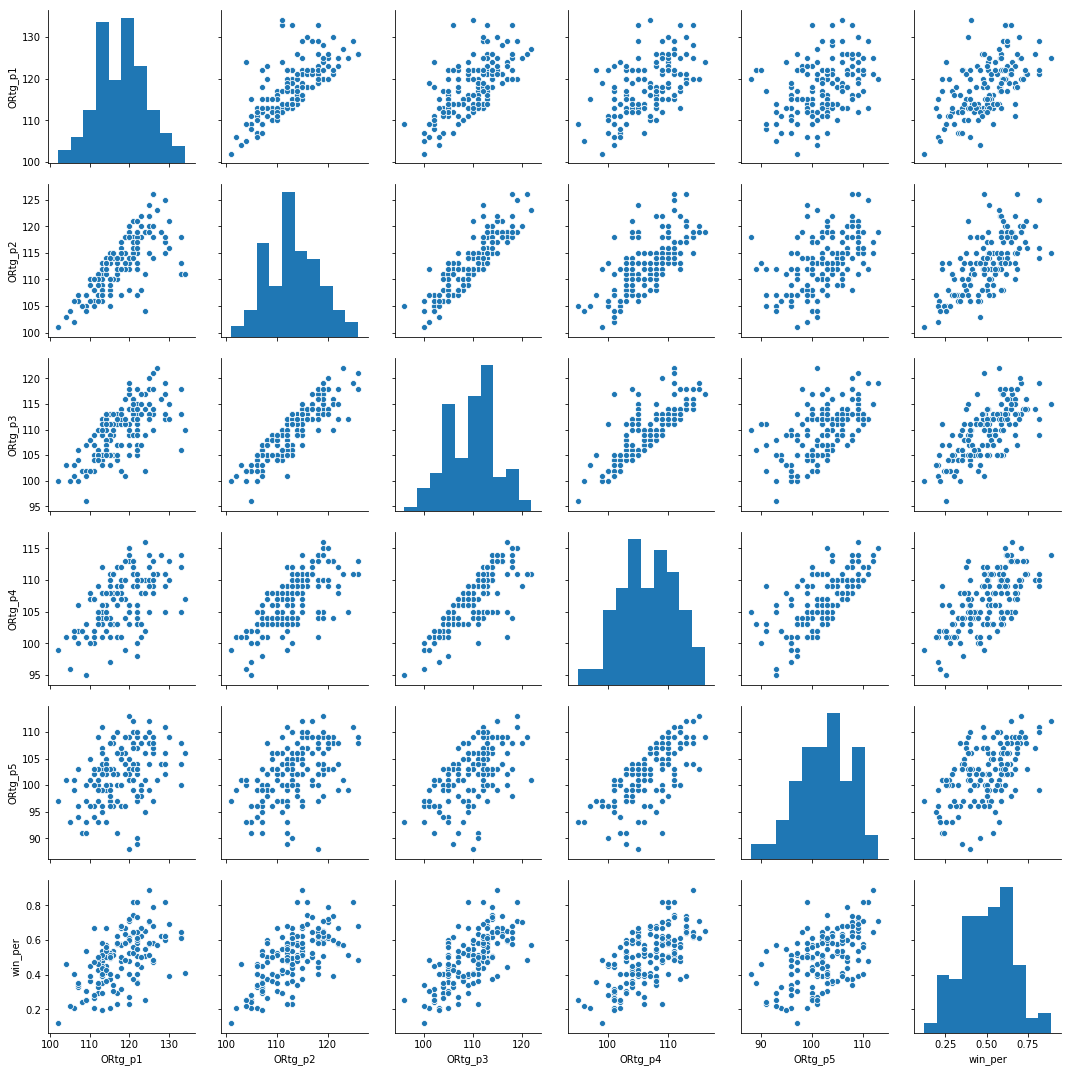

In [59]:
sns.pairplot(new_era.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

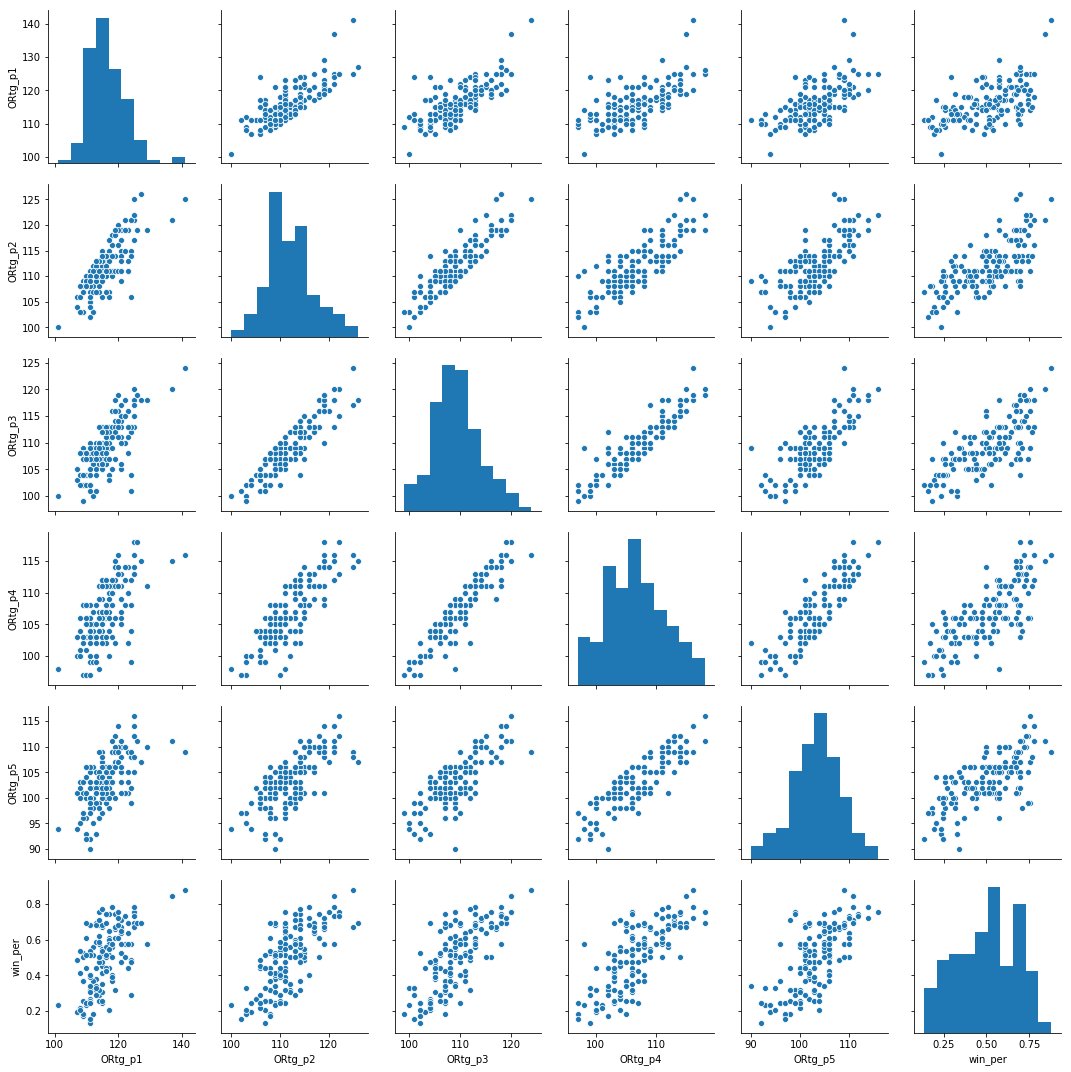

In [60]:
sns.pairplot(old_era.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

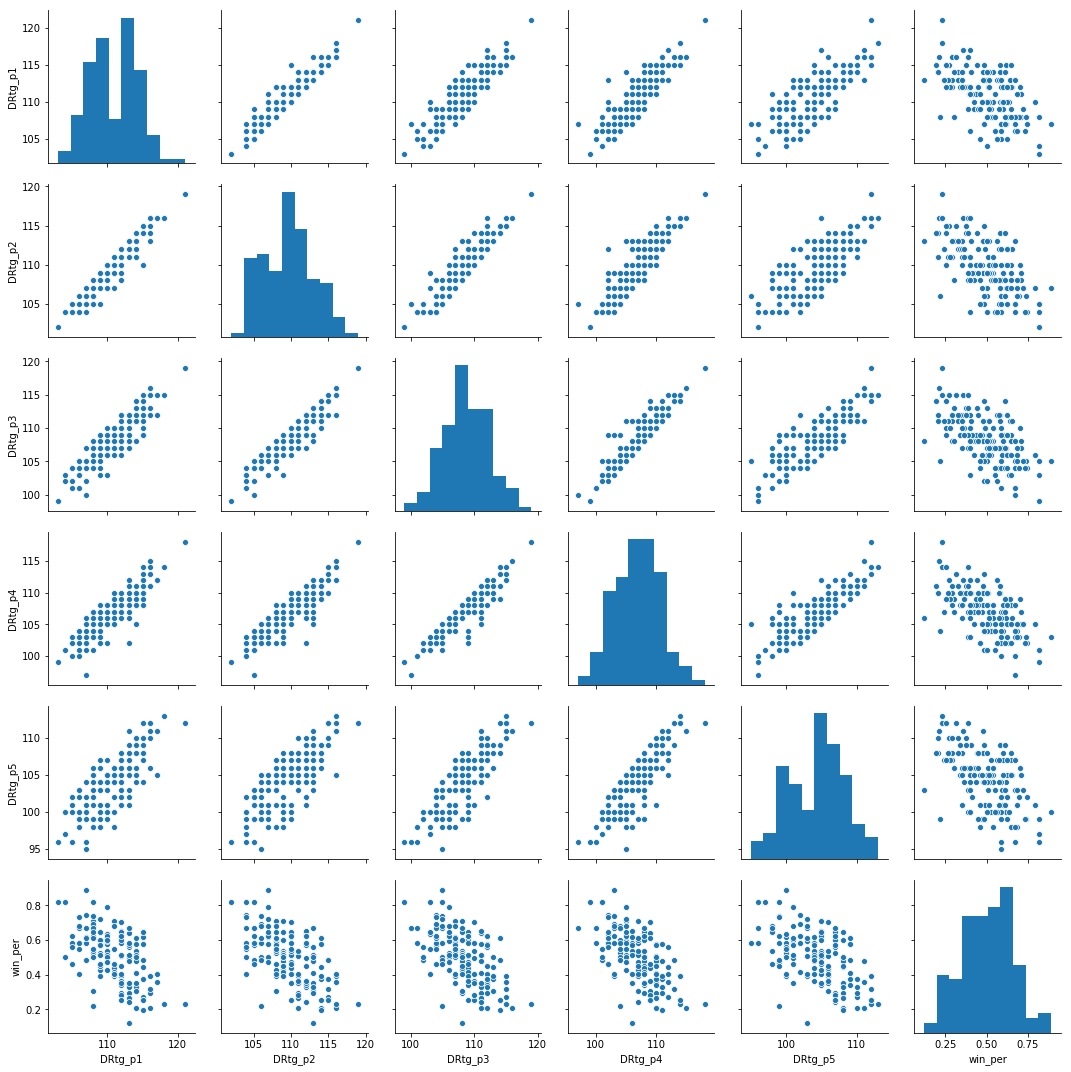

In [61]:
sns.pairplot(new_era.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

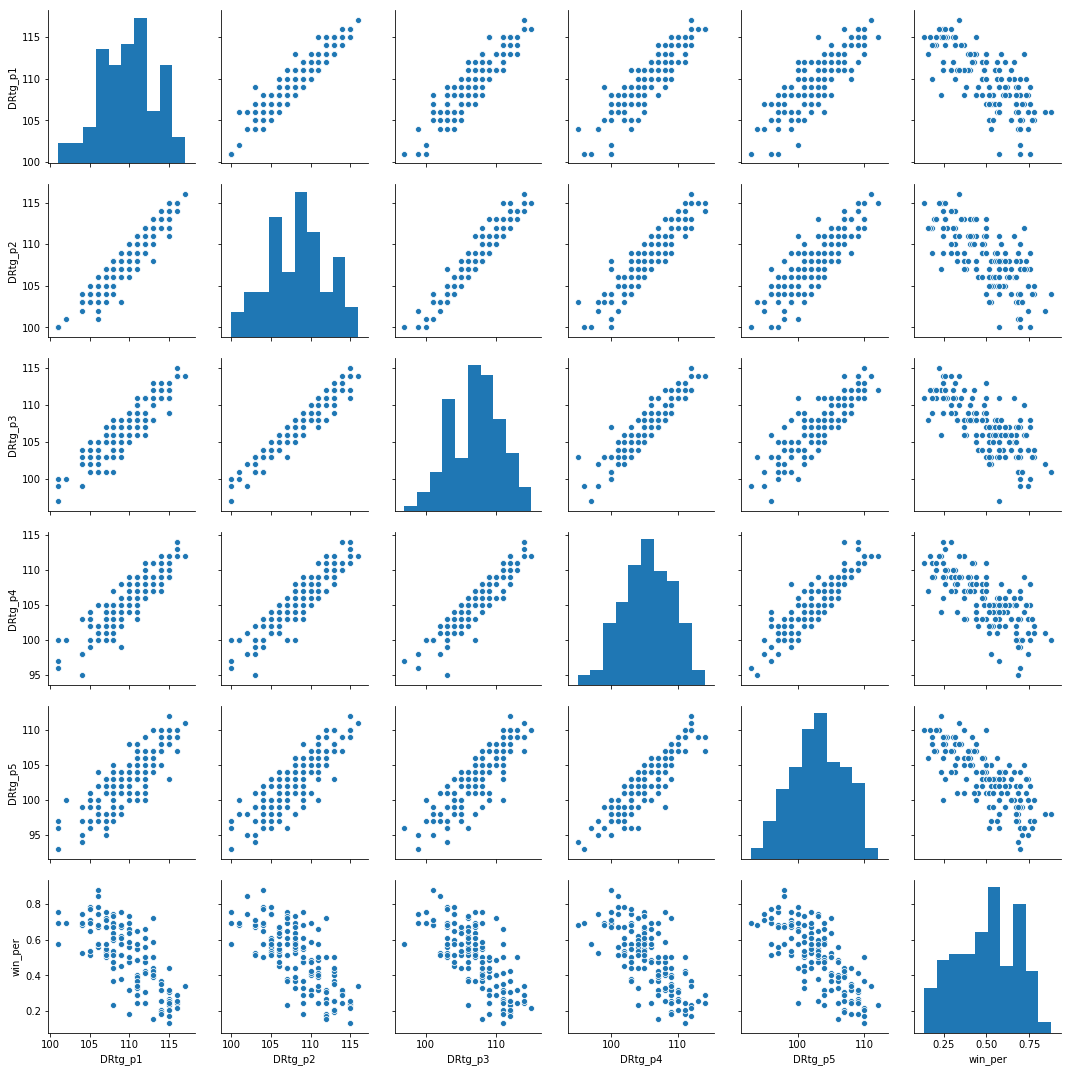

In [62]:
sns.pairplot(old_era.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

In [63]:
# sns.heatmap(new_era.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [64]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5', data=new_era, return_type="dataframe")



# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     70.70
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.70e-49
Time:                        15:20:38   Log-Likelihood:                 206.24
No. Observations:                 150   AIC:                            -390.5
Df Residuals:                     139   BIC:                            -357.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7785      0.229      3.393      0.001       0.325       1.232
ORtg_p1        0.0047      0.001      3.922      0.000       0.002       0.007
ORtg_p2        0.0038      0.002      1.661      0.099      -0.001       0.008
ORtg_p3        0.0049      0.003      1.821      0.071      -0.000       0.010
ORtg_p4        0.0069      0.002      2.987      0.003       0.002       0.011
ORtg_p5        0.0036      0.001      2.589      0.011       0.001       0.006
DRtg_p1       -0.0124      0.005     -2.529      0.013      -0.022      -0.003
DRtg_p2       -0.0055      0.006     -0.955      0.341      -0.017       0.006
DRtg_p3        0.0023      0.005      0.429      0.668      -0.008       0.013
DRtg_p4       -0.0081      0.005     -1.756      0.081      -0.017       0.001
DRtg_p5       -0.0029      0.003     -1.150      0.252      -0.008       0.002
==============================================================================
Omnibus:                        0.612   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.748
Skew:                           0.096   Prob(JB):                        0.688
Kurtosis:                       2.712   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

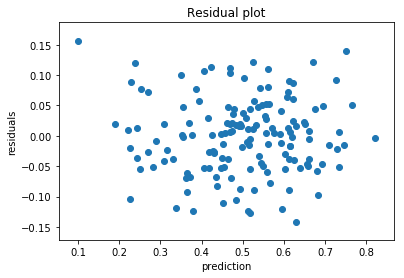

In [65]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    


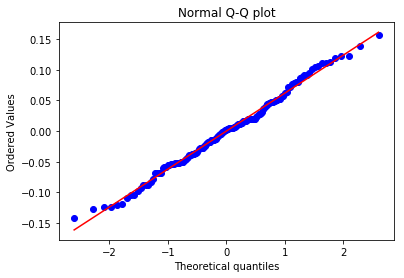

In [66]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

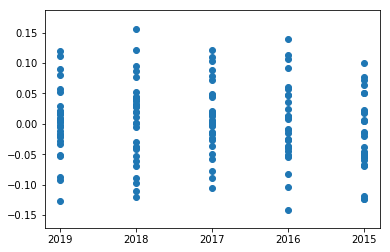

In [67]:
plt.scatter(y=res,x=new_era['year'])

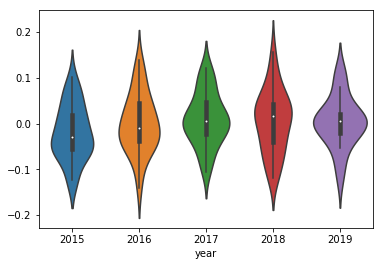

In [68]:
sns.violinplot(y=res,x=new_era['year'])

In [69]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5', data=old_era, return_type="dataframe")


# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     116.7
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           6.70e-60
Time:                        15:23:03   Log-Likelihood:                 207.47
No. Observations:                 141   AIC:                            -392.9
Df Residuals:                     130   BIC:                            -360.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9279      0.234      3.974      0.000       0.466       1.390
ORtg_p1       -0.0003      0.001     -0.206      0.837      -0.003       0.003
ORtg_p2        0.0092      0.003      3.571      0.000       0.004       0.014
ORtg_p3        0.0033      0.003      1.057      0.292      -0.003       0.009
ORtg_p4        0.0053      0.003      1.751      0.082      -0.001       0.011
ORtg_p5        0.0061      0.002      3.213      0.002       0.002       0.010
DRtg_p1       -0.0010      0.004     -0.221      0.825      -0.010       0.008
DRtg_p2       -0.0133      0.006     -2.135      0.035      -0.026      -0.001
DRtg_p3       -0.0024      0.005     -0.439      0.661      -0.013       0.008
DRtg_p4       -0.0025      0.004     -0.602      0.548      -0.011       0.006
DRtg_p5       -0.0088      0.003     -3.000      0.003      -0.015      -0.003
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.346
Skew:                          -0.108   Prob(JB):                        0.841
Kurtosis:                       2.891   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

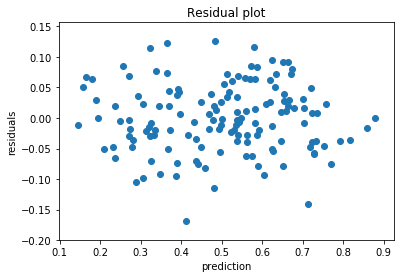

In [70]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    

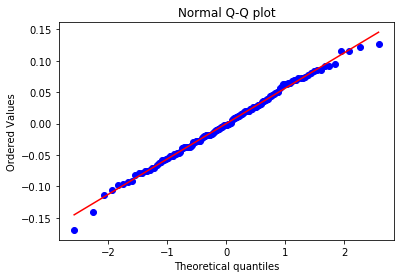

In [71]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

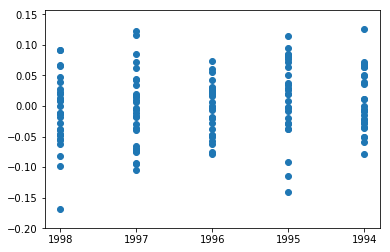

In [73]:
plt.scatter(y=res,x=old_era['year'])

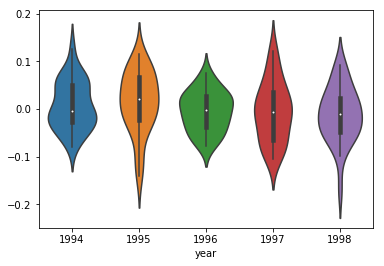

In [75]:
sns.violinplot(y=res,x=old_era['year'])